<a href="https://colab.research.google.com/github/longhtt/Spotify-Hit-Song-ML-Prediction/blob/main/test_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install pandas

In [ ]:
import pandas as pd

In [ ]:
data_file_path = "data/data.csv"
df = pd.read_csv(data_file_path)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
# dropping identfiers
cols_to_drop = ["id", "artists", "name"]
df = df.drop(columns=cols_to_drop, errors="ignore")
df.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,1921,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,1921,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,1921,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,1921,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,1921,0.0380,101.665


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   danceability      170653 non-null  float64
 4   duration_ms       170653 non-null  int64  
 5   energy            170653 non-null  float64
 6   explicit          170653 non-null  int64  
 7   instrumentalness  170653 non-null  float64
 8   key               170653 non-null  int64  
 9   liveness          170653 non-null  float64
 10  loudness          170653 non-null  float64
 11  mode              170653 non-null  int64  
 12  popularity        170653 non-null  int64  
 13  release_date      170653 non-null  object 
 14  speechiness       170653 non-null  float64
 15  tempo             170653 non-null  float64
dtypes: float64(9), int64

In [ ]:
df.describe()


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [ ]:
df["hit"] = (df["popularity"] >= 80).astype(int)


In [ ]:
df["hit"].value_counts(normalize=True)


,proportion
hit,
0,0.995968
1,0.004032


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
valence,0
year,0
acousticness,0
danceability,0
duration_ms,0
energy,0
explicit,0
instrumentalness,0
key,0
liveness,0


In [ ]:
df["year"].describe()


,year
count,170653.000000
mean,1976.787241
std,25.917853
min,1921.000000
25%,1956.000000
50%,1977.000000
75%,1999.000000
max,2020.000000


In [ ]:
df["hit"].value_counts()
df["hit"].value_counts(normalize=True) * 100


,proportion
hit,
0,99.596843
1,0.403157


In [ ]:
df["year"].value_counts().sort_index().head()
df["year"].value_counts().sort_index().tail()


,count
year,
2016,1797
2017,1992
2018,2103
2019,1949
2020,2030


In [ ]:
df["year"].describe()


,year
count,170653.000000
mean,1976.787241
std,25.917853
min,1921.000000
25%,1956.000000
50%,1977.000000
75%,1999.000000
max,2020.000000


<Axes: title={'center': 'Hit Rate Over Time'}, xlabel='year'>

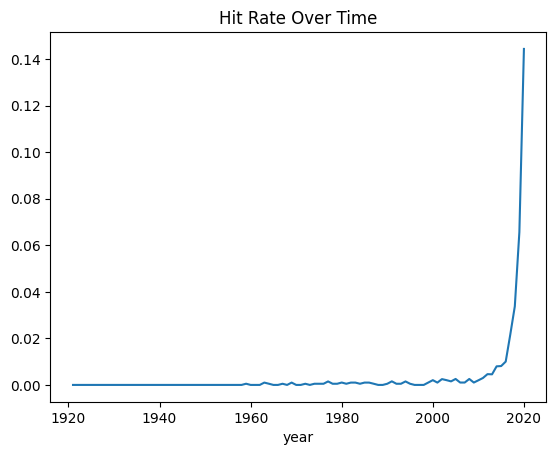

In [ ]:
df.groupby("year")["hit"].mean().plot(
    title="Hit Rate Over Time"
)


We train on tracks released up to 2016 and evaluate on tracks from 2017 onward to simulate real-world prediction under evolving music trends.

In [ ]:
features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo"
]

X = df[features]
y = df["hit"]
